<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
train=pd.read_csv("/datasets/gold_recovery_train_new.csv")
test=pd.read_csv("/datasets/gold_recovery_test_new.csv")
data=pd.read_csv("/datasets/gold_recovery_full_new.csv")

In [3]:
display(data.info())
display(train.info())
display(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

In [4]:
display(data.head())
display(train.head())
display(test.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<div class="alert alert-block alert-success">
✔️ Данные загружены успешно.
</div>

In [5]:
print(train['rougher.output.recovery'].isnull().value_counts())
print(train['rougher.input.feed_au'].isnull().value_counts())
print(train['rougher.output.tail_au'].isnull().value_counts())
print(train['rougher.output.recovery'].isnull().value_counts())

False    14149
Name: rougher.output.recovery, dtype: int64
False    14149
Name: rougher.input.feed_au, dtype: int64
False    14149
Name: rougher.output.tail_au, dtype: int64
False    14149
Name: rougher.output.recovery, dtype: int64


В обучающей выборке,в столбцах,требуемых для расчета,отсутствуют пропуски. 

In [6]:
concentrate_au_column =train['rougher.output.concentrate_au']
feed_au_column = train['rougher.input.feed_au']
tail_au_column = train['rougher.output.tail_au']
input_recovery = train['rougher.output.recovery']
calculated_recovery = concentrate_au_column * (feed_au_column - tail_au_column) / feed_au_column / (concentrate_au_column - tail_au_column) * 100
print('Абсолютная средняя ошибка =', mean_absolute_error(input_recovery, calculated_recovery))

Абсолютная средняя ошибка = 1.0708736259122423e-14


MAE достаточно мало,исходя из этого,значения признака и наши расчеты совпадают.

<div class="alert alert-block alert-success">
✔️ Отличное решение!
</div>

In [7]:
train=train.dropna()
test=test.dropna()

In [8]:
def columns_in_test(trainn,testt):
    for i in trainn.columns:
        if i not in testt.columns:print("Отсутствующие значения в столбце test: ",i)
columns_in_test(train,test)

Отсутствующие значения в столбце test:  final.output.concentrate_ag
Отсутствующие значения в столбце test:  final.output.concentrate_pb
Отсутствующие значения в столбце test:  final.output.concentrate_sol
Отсутствующие значения в столбце test:  final.output.concentrate_au
Отсутствующие значения в столбце test:  final.output.recovery
Отсутствующие значения в столбце test:  final.output.tail_ag
Отсутствующие значения в столбце test:  final.output.tail_pb
Отсутствующие значения в столбце test:  final.output.tail_sol
Отсутствующие значения в столбце test:  final.output.tail_au
Отсутствующие значения в столбце test:  primary_cleaner.output.concentrate_ag
Отсутствующие значения в столбце test:  primary_cleaner.output.concentrate_pb
Отсутствующие значения в столбце test:  primary_cleaner.output.concentrate_sol
Отсутствующие значения в столбце test:  primary_cleaner.output.concentrate_au
Отсутствующие значения в столбце test:  primary_cleaner.output.tail_ag
Отсутствующие значения в столбце tes

В тестовой выборке отсутствуют вышеуказанные столбцы,поскольку они вычисляются по оканчании всех этапов,следовательно являются онлайн-метриками.

In [9]:
train = train.drop(train[train['rougher.output.recovery'] == 0].index)
train[train['rougher.output.recovery'] < 1].head()
train = train.drop(train[train['final.output.recovery'] == 0].index)
train[train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


На этапе предобработки были выявлены и удалены аномальные значения,также пропуски в столбцах,требующихся нам в исследовании.Эффективность обогащения была рассчитана правильно,поскольку MAE достаточно мало.

## Анализ данных

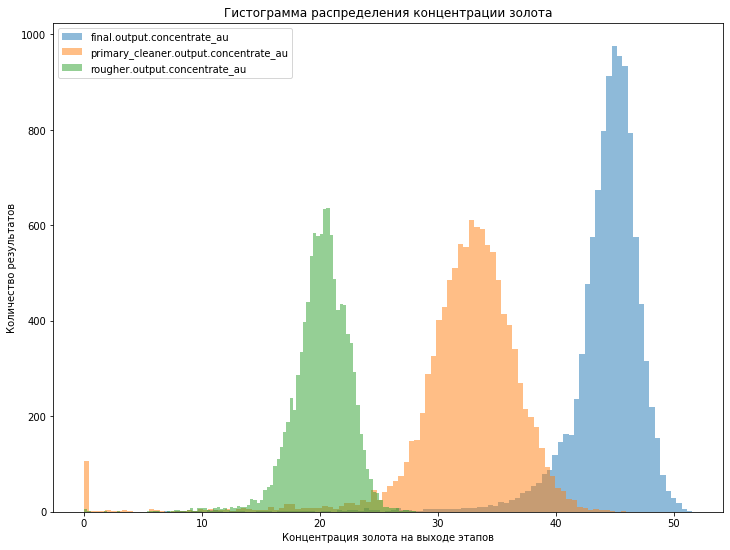

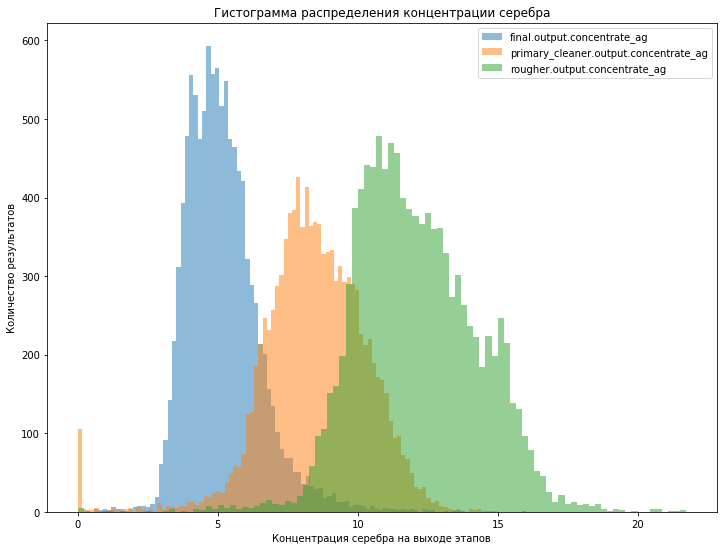

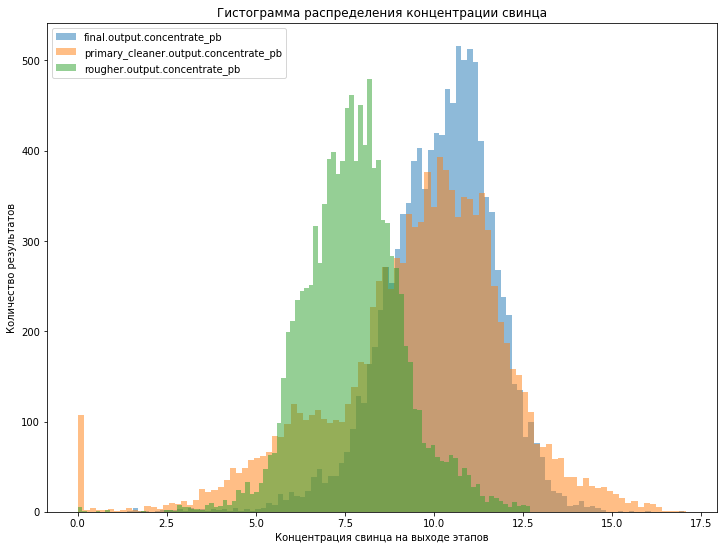

In [10]:
au_train=train[['final.output.concentrate_au','primary_cleaner.output.concentrate_au','rougher.output.concentrate_au']]
ag_train=train[['final.output.concentrate_ag','primary_cleaner.output.concentrate_ag','rougher.output.concentrate_ag']]
pb_train=train[['final.output.concentrate_pb','primary_cleaner.output.concentrate_pb','rougher.output.concentrate_pb']]
def graph_concentrate(data):
    plt.figure(figsize=[12,9])
    for i in data.columns:
        plt.hist(data[i],bins=100,label=i,alpha=0.5)
        if 'au' in i:
            plt.title('Гистограмма распределения концентрации золота')
            plt.xlabel("Концентрация золота на выходе этапов")
        if 'ag' in i:
            plt.title('Гистограмма распределения концентрации серебра')
            plt.xlabel("Концентрация серебра на выходе этапов")
        if 'pb' in i:
            plt.title('Гистограмма распределения концентрации свинца')
            plt.xlabel("Концентрация свинца на выходе этапов")
    plt.ylabel("Количество результатов")
    plt.legend()
graph_concentrate(au_train)
graph_concentrate(ag_train)
graph_concentrate(pb_train)

Концентрация золота повышается с каждым этапом. Цель флотации и очисток увеличить концентрацию золота.Конецентрация серебра понижается с каждым шагом очистки.Концентрация свинца повышается с этапа rougher до primary_cleaner. И потом усредняется.

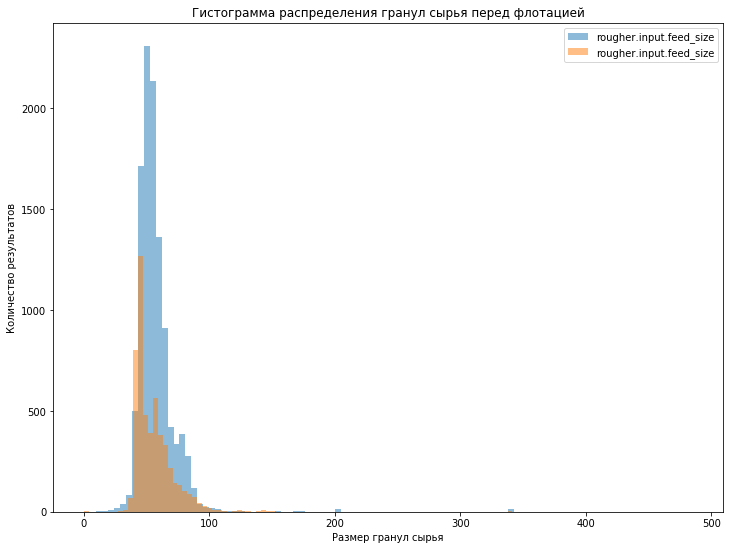

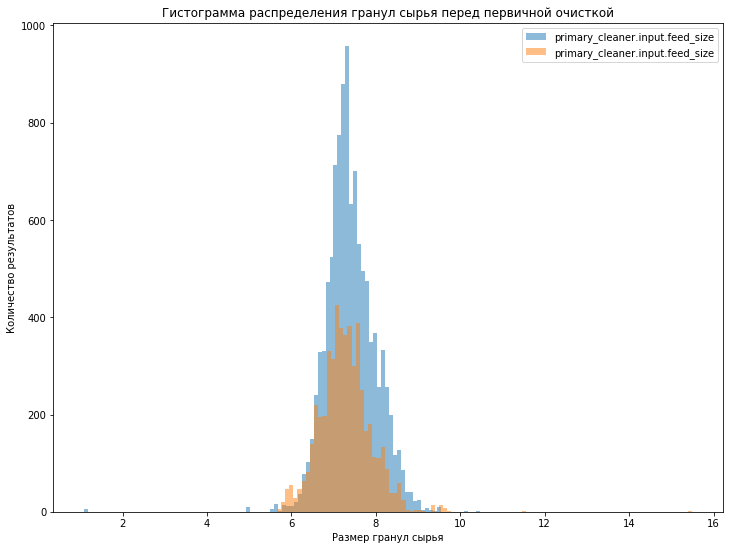

In [11]:
def func_gran(train,test,axis):
    plt.figure(figsize=[12,9])

    plt.hist(train[axis], bins=100, label = axis, alpha=.5)
    plt.hist(test[axis], bins=100, label = axis, alpha=.5)
    plt.xlabel("Размер гранул сырья")
    plt.ylabel("Количество результатов")
    plt.legend()
    if 'rougher' in axis:
        plt.title("Гистограмма распределения гранул сырья перед флотацией")
    else:
        plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
    plt.show()
    
    
func_gran(train,test,'rougher.input.feed_size')
func_gran(train,test,'primary_cleaner.input.feed_size')

Распределение гранул до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Существует много выбросов после размера гранул 100.Размеры гранул перед первичной очисткой обладают нормальным распределением.

In [12]:
final_output_train = (train['final.output.concentrate_au'] + train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] +train['final.output.concentrate_sol'])
primary_cleaner_output_train = (train['primary_cleaner.output.concentrate_au'] + train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] +train['primary_cleaner.output.concentrate_sol'])
rougher_output_train = (train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] +train['rougher.output.concentrate_sol'])

Text(0.5, 1.0, 'Гистограмма распределения концентраций на разных этапах очистки')

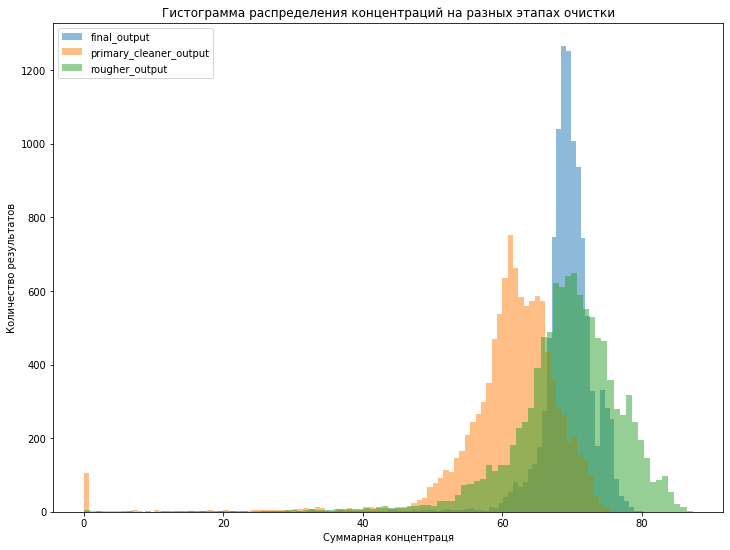

In [13]:
plt.figure(figsize=[12,9])
plt.hist(final_output_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_train, bins=100, label = 'rougher_output', alpha=.5)
plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")
plt.legend()
plt.title("Гистограмма распределения концентраций на разных этапах очистки")

Поскольку в нуле много значений primary_cleaner_output,удалим их.

In [14]:

train = train.drop(train[train['primary_cleaner.output.concentrate_au'] == 0].index)
train[train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


На этапе анализа были визуализированы и изучены концентрации вещест на разных этапах,а также размер гранул тестовой и обучающей выборке.Следующим этапом будем строить модель

## Модель

In [15]:
rougher_features_columns = set(test.columns[1:][12:34])
final_features_columns = set(test.columns[1:])
print(rougher_features_columns)
print()
print(final_features_columns)
columns_to_delete = set(train.columns) - set(test.columns[1:])
print(columns_to_delete)
train_features_final = train.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)
print(set(train_features_final.columns) - set(test.columns))
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_f_air', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_d_air', 'rougher.input.feed_ag', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.state.floatbank10_a_level', 'rougher.input.feed_pb', 'rougher.state.floatbank10_d_level', 'rougher.input.floatbank11_sulfate', 'rougher.state.floatbank10_e_air', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_c_level'}

{'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_f_level', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.input.sulfate', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.input.

In [16]:
train_target_final = train['final.output.recovery']
train_target_rougher = train['rougher.output.recovery']

In [17]:
# код ревьюера для объяснения
demo_model = LinearRegression()
demo_features = train.set_index('date').drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
demo_target = train.set_index('date')[['final.output.recovery', 'rougher.output.recovery']]
demo_model.fit(demo_features, demo_target)
demo_pred = demo_model.predict(demo_features)
demo_pred

array([[70.85960962, 88.5900696 ],
       [69.48169502, 87.78770741],
       [68.6621311 , 87.9073589 ],
       ...,
       [66.59088139, 89.45988272],
       [65.83377618, 88.10847491],
       [68.32602655, 87.32802517]])

In [18]:
test_features_final = test.drop('date', axis=1)
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

{'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.input.sulfate', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.input.feed_size', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank5_a_air', 'primary_cleaner.state.floatbank8_b_level', 'secondary_cleaner.state.floatbank2_b_level', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank6_a_level', 'primary_cleaner.input.xanthate', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_b_air', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_d_air', 'secondary_clea

Сделаем функцию sMAPE

In [19]:
def sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    final_sMAPE = ((2*abs(final_recovery_real - final_recovery_predicted)/
                     (abs(final_recovery_real) + abs(final_recovery_predicted))).sum() * 100 / n)
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

In [20]:
%%time
regressor = LinearRegression()
print('Mean R2 from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of LinearRegression = -0.19455349428687826
Mean MAE from CV of LinearRegression = -5.903842205297186
CPU times: user 1.64 s, sys: 1.5 s, total: 3.14 s
Wall time: 3.18 s


In [21]:
%%time

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
print('Mean R2 from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of PolynomialRegression with 2 degree = -53.89653167918615
Mean MAE from CV of PolynomialRegression with 2 degree = -31.70119742197959
CPU times: user 1min 45s, sys: 52 s, total: 2min 37s
Wall time: 2min 38s


Для регрессоров Ridge и DecisionTreeRegressor применим метод GridSearchCV. В нем уже вложена кросс-валидация.

In [22]:
%%time

regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]

scores = ['r2', 'neg_mean_absolute_error']

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()
    clf = GridSearchCV(regressor, hyperparams, scoring=score)
    clf.fit(train_features_final, train_target_final)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

# Tuning hyper-parameters for r2



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'alpha': 10, 'solver': 'sparse_cg'}

Grid scores on development set:

-0.236 (+/-0.480) for {'alpha': 0.1, 'solver': 'auto'}
-0.235 (+/-0.480) for {'alpha': 1, 'solver': 'auto'}
-0.235 (+/-0.484) for {'alpha': 10, 'solver': 'auto'}
-0.224 (+/-0.497) for {'alpha': 100, 'solver': 'auto'}
-0.236 (+/-0.480) for {'alpha': 0.1, 'solver': 'svd'}
-0.235 (+/-0.480) for {'alpha': 1, 'solver': 'svd'}
-0.235 (+/-0.484) for {'alpha': 10, 'solver': 'svd'}
-0.224 (+/-0.497) for {'alpha': 100, 'solver': 'svd'}
-0.236 (+/-0.480) for {'alpha': 0.1, 'solver': 'cholesky'}
-0.235 (+/-0.480) for {'alpha': 1, 'solver': 'cholesky'}
-0.235 (+/-0.484) for {'alpha': 10, 'solver': 'cholesky'}
-0.224 (+/-0.497) for {'alpha': 100, 'solver': 'cholesky'}
-0.470 (+/-0.715) for {'alpha': 0.1, 'solver': 'lsqr'}
-0.470 (+/-0.715) for {'alpha': 1, 'solver': 'lsqr'}
-0.470 (+/-0.715) for {'alpha': 10, 'solver': 'lsqr'}
-0.470 (+/-0.715) for {'alpha': 100, 'solver': 'lsqr'}
-0

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'alpha': 10, 'solver': 'sparse_cg'}

Grid scores on development set:

-6.801 (+/-2.599) for {'alpha': 0.1, 'solver': 'auto'}
-6.801 (+/-2.601) for {'alpha': 1, 'solver': 'auto'}
-6.800 (+/-2.620) for {'alpha': 10, 'solver': 'auto'}
-6.758 (+/-2.685) for {'alpha': 100, 'solver': 'auto'}
-6.801 (+/-2.599) for {'alpha': 0.1, 'solver': 'svd'}
-6.801 (+/-2.601) for {'alpha': 1, 'solver': 'svd'}
-6.800 (+/-2.620) for {'alpha': 10, 'solver': 'svd'}
-6.758 (+/-2.685) for {'alpha': 100, 'solver': 'svd'}
-6.801 (+/-2.599) for {'alpha': 0.1, 'solver': 'cholesky'}
-6.801 (+/-2.601) for {'alpha': 1, 'solver': 'cholesky'}
-6.800 (+/-2.620) for {'alpha': 10, 'solver': 'cholesky'}
-6.758 (+/-2.685) for {'alpha': 100, 'solver': 'cholesky'}
-7.416 (+/-3.060) for {'alpha': 0.1, 'solver': 'lsqr'}
-7.416 (+/-3.060) for {'alpha': 1, 'solver': 'lsqr'}
-7.416 (+/-3.060) for {'alpha': 10, 'solver': 'lsqr'}
-7.415 (+/-3.061) for {'alpha': 100, 'solver': 'lsqr'}
-6

In [23]:
%%time

regressor = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'criterion':['mse'], 'max_depth':max_depth_list, 'random_state':[15062020]},
               {'criterion':['mae'], 'max_depth':max_depth_list, 'random_state':[15062020]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

# Tuning hyper-parameters



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'criterion': 'mae', 'max_depth': 2, 'random_state': 15062020}

Grid scores on development set:

-0.134 (+/-0.286) for {'criterion': 'mse', 'max_depth': 2, 'random_state': 15062020}
-0.055 (+/-0.188) for {'criterion': 'mse', 'max_depth': 4, 'random_state': 15062020}
-0.260 (+/-0.131) for {'criterion': 'mse', 'max_depth': 6, 'random_state': 15062020}
-0.435 (+/-0.091) for {'criterion': 'mse', 'max_depth': 8, 'random_state': 15062020}
-0.878 (+/-0.074) for {'criterion': 'mse', 'max_depth': 10, 'random_state': 15062020}
-0.890 (+/-0.322) for {'criterion': 'mse', 'max_depth': 12, 'random_state': 15062020}
-1.023 (+/-0.408) for {'criterion': 'mse', 'max_depth': 14, 'random_state': 15062020}
-1.160 (+/-0.837) for {'criterion': 'mse', 'max_depth': 16, 'random_state': 15062020}
-1.398 (+/-1.096) for {'criterion': 'mse', 'max_depth': 18, 'random_state': 15062020}
-1.364 (+/-0.945) for {'criterion': 'mse', 'max_depth': 20, 'random_state': 15062020}


In [28]:
rougher_recovery_real = data.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = data.loc[test_features_final.index,'final.output.recovery']
not_nan_index = set(test_features_rougher.index)
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))

In [29]:
median_rougher_recovery = data['rougher.output.recovery'].median()
median_final_recovery = data['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для медианной константной модели 11.679754848001743


In [26]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=15062020)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted)) 

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для линейной регресии 12.623643558078957
sMAPE для полиноминальной регресии 25.95615758030087
sMAPE для регресии Ridge 12.527117382169768
sMAPE для DecisionTreeRegressor 12.94752083927472
sMAPE для медианной константной модели 11.679754848001743
CPU times: user 1min 2s, sys: 0 ns, total: 1min 2s
Wall time: 1min 2s


In [30]:
model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('R2 Ridge model =', r2_score(final_recovery_real, final_recovery_predicted))
print('MAE Ridge model =', mean_absolute_error(final_recovery_real, final_recovery_predicted))
print()

final_median_predict = pd.Series(median_final_recovery, index=not_nan_index)
print('R2 constant model =', r2_score(final_recovery_real, final_median_predict))
print('MAE constant model =', mean_absolute_error(final_recovery_real, final_median_predict))

R2 Ridge model = -0.32261277705593727
MAE Ridge model = 7.510620154638339

R2 constant model = -0.15530194696012067
MAE constant model = 6.706628293443592


Была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска гипер параметром GridSearchCV.

Была отобрана лучшая модель - Ridge. Ее значение sMAPE самое низкое.

# Общий вывод

В ходе работы было выполнено:

Подготовлены данные.
Проведен исследовательский анализ данных.
Построена и обучена модель.
Регрессор Ridge показал себя лучше обычной линейной регресии. sMAPE показал 12.62. Если сравнивать с константной моделью, значение проигрывает на 0.8. Другие метрики тоже говорят о том, что константная модель адекватнее выбранной